In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic-datasets/train.csv
/kaggle/input/titanic-datasets/test.csv


In [2]:
# Importing Classifier Modules
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

import numpy as np

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Perceptron
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import pandas as pd

training = pd.read_csv('../input/titanic-datasets/train.csv')
testing = pd.read_csv('../input/titanic-datasets/test.csv')

In [3]:
training.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
training.shape


(891, 12)

In [5]:
testing.shape

(418, 11)

In [6]:
training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
testing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [8]:
training.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
testing.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [10]:
def bar_chart(attribute):
    survived = training[training['Survived']==1][attribute].value_counts()
    death = training[training['Survived']==0][attribute].value_counts()
    df = pd.DataFrame([survived,death])
    df.index = ['Survived','Death']
    df.plot(kind='bar',stacked=True, figsize=(15,3))

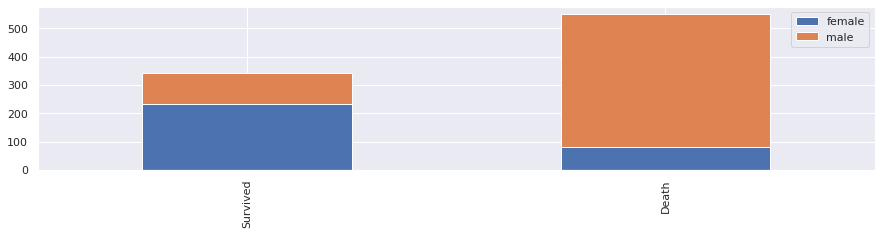

In [11]:
bar_chart('Sex')

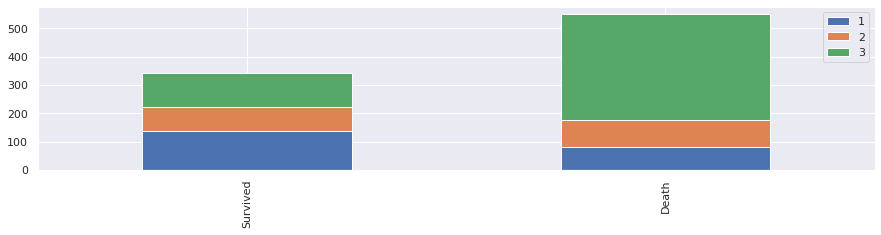

In [12]:
bar_chart('Pclass')

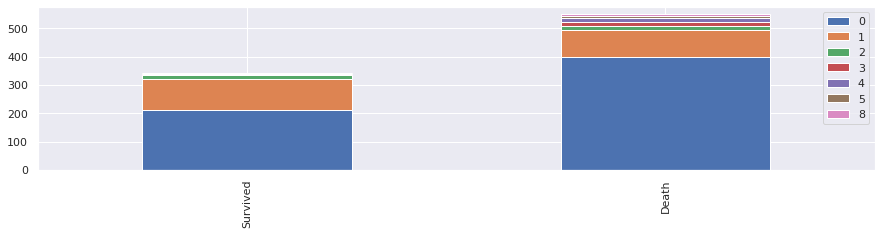

In [13]:
bar_chart('SibSp')

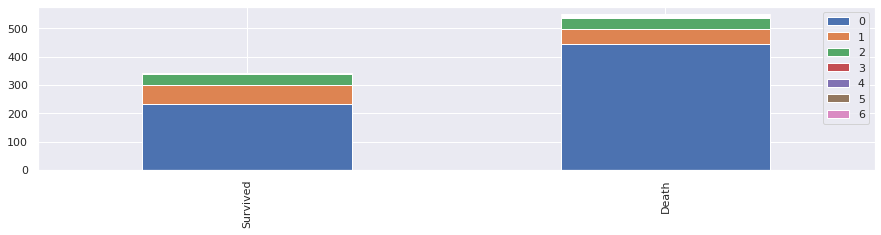

In [14]:
bar_chart('Parch')

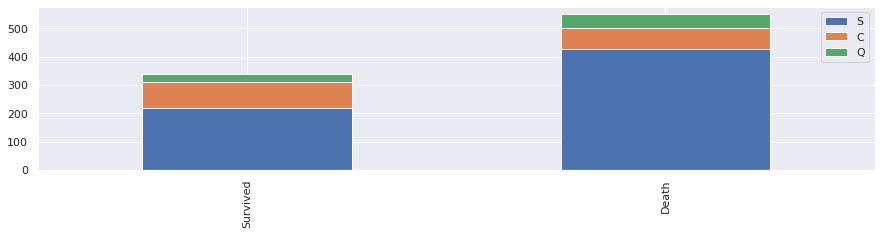

In [15]:
bar_chart('Embarked')

In [16]:
training.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [17]:
training_testing_data = [training, testing] # combining train and test dataset

for data in training_testing_data:
    data['Title'] = data['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

In [18]:
training['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Countess      1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: Title, dtype: int64

In [19]:
testing['Title'].value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Ms          1
Dr          1
Dona        1
Name: Title, dtype: int64

In [20]:
title_mapping = {"Mr": 0, "Miss": 1, "Mrs": 2, 
                 "Master": 3, "Dr": 3, "Rev": 3, "Col": 3, "Major": 3, "Mlle": 3,"Countess": 3,
                 "Ms": 3, "Lady": 3, "Jonkheer": 3, "Don": 3, "Dona" : 3, "Mme": 3,"Capt": 3,"Sir": 3 }
for data in training_testing_data:
    data['Title'] = data['Title'].map(title_mapping)

In [21]:
training.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [22]:
testing.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,2
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,2


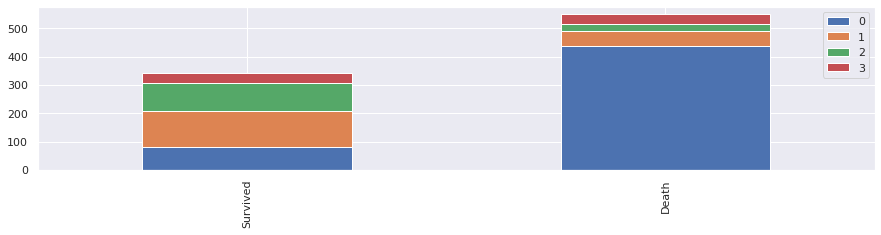

In [23]:
bar_chart('Title')

In [24]:
training.drop('Name', axis=1, inplace=True)
testing.drop('Name', axis=1, inplace=True)

In [25]:
training.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,0


In [26]:
testing.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,female,47.0,1,0,363272,7.0000,NaN,S,2
2,894,2,male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,female,22.0,1,1,3101298,12.2875,NaN,S,2


In [27]:
sex_mapping = {"male": 0, "female": 1}
for data in training_testing_data:
    data['Sex'] = data['Sex'].map(sex_mapping)

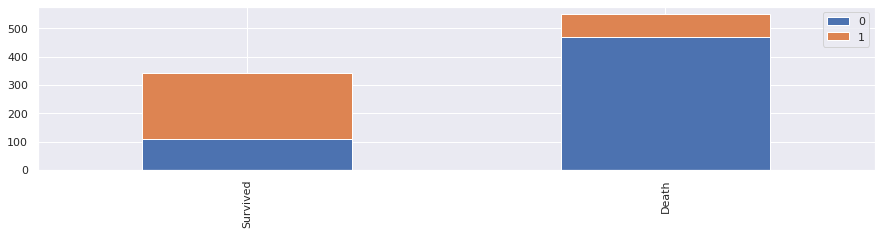

In [28]:
bar_chart('Sex')

In [29]:
training.head(100)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,1,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,1,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,0,35.0,0,0,373450,8.0500,NaN,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,0,3,0,NaN,0,0,374910,8.0500,NaN,S,0
96,97,0,1,0,71.0,0,0,PC 17754,34.6542,A5,C,0
97,98,1,1,0,23.0,0,1,PC 17759,63.3583,D10 D12,C,0
98,99,1,2,1,34.0,0,1,231919,23.0000,NaN,S,2


In [30]:
training["Age"].fillna(training.groupby("Title")["Age"].transform("median"), inplace=True)
testing["Age"].fillna(testing.groupby("Title")["Age"].transform("median"), inplace=True)

In [31]:
training.head(30)
training.groupby("Title")["Age"].transform("median")

0      30.0
1      35.0
2      21.0
3      35.0
4      30.0
       ... 
886     9.0
887    21.0
888    21.0
889    30.0
890    30.0
Name: Age, Length: 891, dtype: float64

In [32]:
training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    int64  
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        204 non-null    object 
 10  Embarked     889 non-null    object 
 11  Title        891 non-null    int64  
dtypes: float64(2), int64(7), object(3)
memory usage: 83.7+ KB


In [33]:
testing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    int64  
 3   Age          418 non-null    float64
 4   SibSp        418 non-null    int64  
 5   Parch        418 non-null    int64  
 6   Ticket       418 non-null    object 
 7   Fare         417 non-null    float64
 8   Cabin        91 non-null     object 
 9   Embarked     418 non-null    object 
 10  Title        418 non-null    int64  
dtypes: float64(2), int64(6), object(3)
memory usage: 36.0+ KB


In [34]:
for data in training_testing_data:    
    data.loc[ data['Age'] <= 16, 'Age'] = 0
    data.loc[(data['Age'] > 16) & (data['Age'] <= 26), 'Age'] = 1
    data.loc[(data['Age'] > 26) & (data['Age'] <= 36), 'Age'] = 2
    data.loc[(data['Age'] > 36) & (data['Age'] <= 62), 'Age'] = 3
    data.loc[ data['Age'] > 62, 'Age']=4
training.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,1,3.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,1,2.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,0,2.0,0,0,373450,8.0500,NaN,S,0


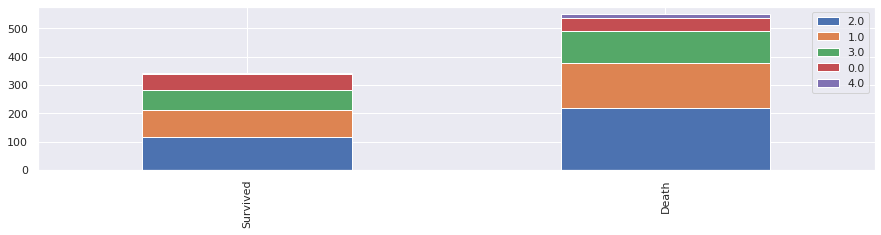

In [35]:
bar_chart('Age')

<AxesSubplot:>

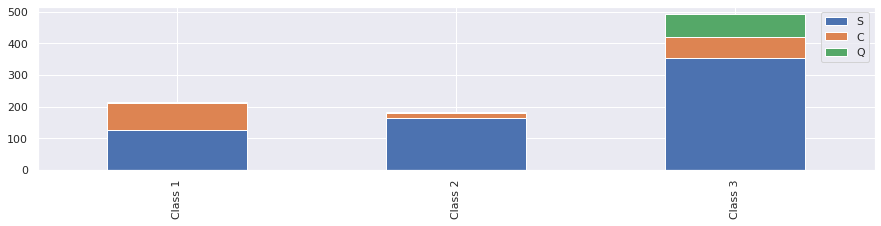

In [36]:
Pclass1 = training[training['Pclass']==1]['Embarked'].value_counts()
Pclass2 = training[training['Pclass']==2]['Embarked'].value_counts()
Pclass3 = training[training['Pclass']==3]['Embarked'].value_counts()
df = pd.DataFrame([Pclass1, Pclass2, Pclass3])
df.index = ['Class 1','Class 2', 'Class 3']
df.plot(kind='bar',stacked=True, figsize=(15,3))

In [37]:
for data in training_testing_data:
    data['Embarked'] = data['Embarked'].fillna('S')

In [38]:
training.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,1,3.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,1,2.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,0,2.0,0,0,373450,8.0500,NaN,S,0


In [39]:
embarked_mapping = {"S": 0, "C": 1, "Q": 2}
for data in training_testing_data:
    data['Embarked'] = data['Embarked'].map(embarked_mapping)

In [40]:
training["Fare"].fillna(training.groupby("Pclass")["Fare"].transform("median"), inplace=True)
testing["Fare"].fillna(testing.groupby("Pclass")["Fare"].transform("median"), inplace=True)
training.head(5)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,7.2500,NaN,0,0
1,2,1,1,1,3.0,1,0,PC 17599,71.2833,C85,1,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,7.9250,NaN,0,1
3,4,1,1,1,2.0,1,0,113803,53.1000,C123,0,2
4,5,0,3,0,2.0,0,0,373450,8.0500,NaN,0,0


In [41]:
training.info

<bound method DataFrame.info of      PassengerId  Survived  Pclass  Sex  Age  SibSp  Parch            Ticket  \
0              1         0       3    0  1.0      1      0         A/5 21171   
1              2         1       1    1  3.0      1      0          PC 17599   
2              3         1       3    1  1.0      0      0  STON/O2. 3101282   
3              4         1       1    1  2.0      1      0            113803   
4              5         0       3    0  2.0      0      0            373450   
..           ...       ...     ...  ...  ...    ...    ...               ...   
886          887         0       2    0  2.0      0      0            211536   
887          888         1       1    1  1.0      0      0            112053   
888          889         0       3    1  1.0      1      2        W./C. 6607   
889          890         1       1    0  1.0      0      0            111369   
890          891         0       3    0  2.0      0      0            370376   

       

In [42]:
  
for data in training_testing_data:    
    data.loc[ data['Fare'] <= 17, 'Fare'] = 0
    data.loc[(data['Fare'] > 17) & (data['Fare'] <= 30), 'Fare'] = 1
    data.loc[(data['Fare'] > 30) & (data['Fare'] <= 100), 'Fare'] = 2
    data.loc[(data['Fare'] > 100), 'Fare'] = 3


In [43]:
training.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,0.0,NaN,0,0
1,2,1,1,1,3.0,1,0,PC 17599,2.0,C85,1,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,0.0,NaN,0,1
3,4,1,1,1,2.0,1,0,113803,2.0,C123,0,2
4,5,0,3,0,2.0,0,0,373450,0.0,NaN,0,0


In [44]:
training.Cabin.value_counts()

B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: Cabin, Length: 147, dtype: int64

In [45]:
for data in training_testing_data:
    data['Cabin'] = data['Cabin'].str[:1]

In [46]:
cabin_mapping = {"A": 0, "B": 0.4, "C": 0.8, "D": 1.2, "E": 1.6, "F": 2, "G": 2.4, "T": 2.8}
for data in training_testing_data:
    data['Cabin'] = data['Cabin'].map(cabin_mapping)

In [47]:
training["Cabin"].fillna(training.groupby("Pclass")["Cabin"].transform("median"), inplace=True)
testing["Cabin"].fillna(testing.groupby("Pclass")["Cabin"].transform("median"), inplace=True)

In [48]:
training.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,0.0,2.0,0,0
1,2,1,1,1,3.0,1,0,PC 17599,2.0,0.8,1,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,0.0,2.0,0,1
3,4,1,1,1,2.0,1,0,113803,2.0,0.8,0,2
4,5,0,3,0,2.0,0,0,373450,0.0,2.0,0,0


In [49]:

training["FamilySize"] = training["SibSp"] + training["Parch"] + 1
testing["FamilySize"] = testing["SibSp"] + testing["Parch"] + 1

In [50]:
family_mapping = {1: 0, 2: 0.4, 3: 0.8, 4: 1.2, 5: 1.6, 6: 2, 7: 2.4, 8: 2.8, 9: 3.2, 10: 3.6, 11: 4}
for data in training_testing_data:
    data['FamilySize'] = data['FamilySize'].map(family_mapping)

In [51]:
training.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilySize
0,1,0,3,0,1.0,1,0,A/5 21171,0.0,2.0,0,0,0.4
1,2,1,1,1,3.0,1,0,PC 17599,2.0,0.8,1,2,0.4
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,0.0,2.0,0,1,0.0
3,4,1,1,1,2.0,1,0,113803,2.0,0.8,0,2,0.4
4,5,0,3,0,2.0,0,0,373450,0.0,2.0,0,0,0.0


In [52]:
attributes_drop = ['Ticket', 'SibSp', 'Parch']
training = training.drop(attributes_drop, axis=1)
testing = testing.drop(attributes_drop, axis=1)
training = training.drop(['PassengerId'], axis=1)

In [53]:
training_data = training.drop('Survived', axis=1)
target_data = training['Survived']
X_test = testing.drop("PassengerId", axis=1).copy()
training_data.shape, target_data.shape, X_test.shape

((891, 8), (891,), (418, 8))

In [54]:
training.head(10)

,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,FamilySize
0,0,3,0,1.0,0.0,2.0,0,0,0.4
1,1,1,1,3.0,2.0,0.8,1,2,0.4
2,1,3,1,1.0,0.0,2.0,0,1,0.0
3,1,1,1,2.0,2.0,0.8,0,2,0.4
4,0,3,0,2.0,0.0,2.0,0,0,0.0
5,0,3,0,2.0,0.0,2.0,2,0,0.0
6,0,1,0,3.0,2.0,1.6,0,0,0.0
7,0,3,0,0.0,1.0,2.0,0,3,1.6
8,1,3,1,2.0,0.0,2.0,0,2,0.8
9,1,2,1,0.0,2.0,1.8,1,2,0.4


In [55]:
svc = SVC()
svc.fit(training_data, target_data)
acc_svc = round(svc.score(training_data, target_data) * 100, 2)
acc_svc


83.84

In [56]:
perceptron = Perceptron()
perceptron.fit(training_data, target_data)
Y_pred = perceptron.predict(X_test)
acc_perceptron = round(perceptron.score(training_data, target_data) * 100, 2)
acc_perceptron

64.76

In [57]:
logreg = LogisticRegression()
logreg.fit(training_data, target_data)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(training_data, target_data) * 100, 2)
acc_log

82.15

In [58]:
sgd = SGDClassifier()
sgd.fit(training_data, target_data)
Y_pred = sgd.predict(X_test)
acc_sgd = round(sgd.score(training_data, target_data) * 100, 2)
acc_sgd

56.12

In [59]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(training_data, target_data)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(training_data, target_data) * 100, 2)
acc_decision_tree

90.01

In [60]:

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(training_data, target_data)
Y_pred = random_forest.predict(X_test)
random_forest.score(training_data, target_data)
acc_random_forest = round(random_forest.score(training_data, target_data) * 100, 2)
acc_random_forest

90.01

In [61]:
gaussian = GaussianNB()
gaussian.fit(training_data, target_data)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(training_data, target_data) * 100, 2)
acc_gaussian

78.9

In [62]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(training_data, target_data)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(training_data, target_data) * 100, 2)
acc_knn

86.98

In [63]:
linear_svc = LinearSVC()
linear_svc.fit(training_data, target_data)
Y_pred = linear_svc.predict(X_test)
acc_linear_svc = round(linear_svc.score(training_data, target_data) * 100, 2)
acc_linear_svc

81.59

In [64]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree'],
    'Score': [acc_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_sgd, acc_linear_svc, acc_decision_tree]})
models.sort_values(by='Score', ascending=False)

,Model,Score
3,Random Forest,90.01
8,Decision Tree,90.01
1,KNN,86.98
0,Support Vector Machines,83.84
2,Logistic Regression,82.15
7,Linear SVC,81.59
4,Naive Bayes,78.90
5,Perceptron,64.76
6,Stochastic Gradient Decent,56.12
